# Mushroom Edibility Prediction

## Imports

In [229]:
import torch
from torch import nn #This is to build the neural networks
from torch.utils.data import Dataset, DataLoader #Data loader object
import numpy as np #for array operations.
import pandas as pd
from torch.optim import Adam #This is for optimizer.
from sklearn.model_selection import train_test_split #to split the data

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve # scores

import matplotlib.pyplot as plt
import seaborn as sns #these are for viewing.

from scipy import stats #for statistics.

device = "mps"


## Data Preprocessing

In [230]:
mushroom = pd.read_csv("mushrooms.csv", delimiter=",")
mushroom.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [231]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [232]:
print(mushroom["class"].value_counts())

class
e    4208
p    3916
Name: count, dtype: int64


In [233]:
a = mushroom.describe()[1:2]
a = a.transpose()
display(a) #as we can see the veil-type is irrelevant because it has only a value

a["unique"].sum()

mushroom = mushroom.drop(columns="veil-type")

,unique
class,2
cap-shape,6
cap-surface,4
cap-color,10
bruises,2
odor,9
gill-attachment,2
gill-spacing,2
gill-size,2
gill-color,12


In [234]:
Y = mushroom["class"]
mushroom_copy = mushroom.copy()
X = mushroom.drop(columns="class")
display("DATA before one-hot ecnoding:")
display(X)
X = pd.get_dummies(data = X, prefix=[column for column in X.columns], dtype=float)
display("DATA after one-hot ecnoding:")
display(X)

'DATA before one-hot ecnoding:'

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,s,w,w,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,s,o,o,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,s,o,o,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,s,o,o,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,s,k,w,w,w,o,e,w,v,l


'DATA after one-hot ecnoding:'

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [235]:
#one-hot encoding the target value as well

mapper = {"p" : 1.0, "e":0.0}

Y = Y.map(mapper)
display(Y)

0       1.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
8119    0.0
8120    0.0
8121    0.0
8122    1.0
8123    0.0
Name: class, Length: 8124, dtype: float64

In [236]:
##Train test splitting = 
X = X.to_numpy()
Y = Y.to_numpy()
display(X)
display(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size = 0.5)

print (X_train.shape)
print (X_val.shape)
print (X_test.shape)

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([1., 0., 0., ..., 0., 1., 0.])

(5686, 116)
(1219, 116)
(1219, 116)


### Dataset Object

In [237]:
class dataset(Dataset):
    def __init__(self,X, Y):
        self.X = torch.tensor(X, dtype= torch.float32).to(device="mps")
        self.Y = torch.tensor(Y, dtype= torch.float32 ).to(device="mps")

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.Y[index]

#we can do the same with TensorDataset which pytorch provides.

train_data = dataset(X_train,Y_train)
test_data = dataset(X_test,Y_test)
validation_data = dataset(X_val,Y_val)
# from torch.utils.data import TensorDataset

#blabla_data = TensorDataset(torch.tensor(X, dtype = torch.float32), torch.tensor(Y, dtype= torch.float32) )
train_data.__getitem__(2)

(tensor([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
         1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
         0., 1., 0., 0., 0., 0., 0., 0.], device='mps:0'),
 tensor(1., device='mps:0'))

In [238]:
from torch.utils.data import BatchSampler, RandomSampler

### Data Loader

In [239]:
def loaders(train, test, val) -> dict[str,any]:
    
    loaders = {"train":train, "test":test, "validation":val}

    for key, val in loaders.items():

        loaders[key] = DataLoader(dataset=val, batch_sampler = 
                                  BatchSampler(
            sampler=RandomSampler(val),
            batch_size=64,
            drop_last=True
            )
        )

    print(loaders)
    return loaders["train"], loaders["test"], loaders["validation"]


In [240]:
train_dataloader, test_dataloader, validation_dataloader = loaders(train=train_data, test=test_data, val=validation_data)


{'train': <torch.utils.data.dataloader.DataLoader object at 0x32743adb0>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x3274e1310>, 'validation': <torch.utils.data.dataloader.DataLoader object at 0x32743bef0>}


In [241]:
for x, y in train_dataloader:
    print(x)
    print("==============")
    print(y)
    break

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.]], device='mps:0')
tensor([1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
        1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 1., 1., 1.], device='mps:0')


## MLP Model

In [242]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.input_layer = nn.Linear(X.shape[1], 10) 
        self.norm1 = nn.BatchNorm1d(10)
        self.relu1 = nn.ReLU()

        self.linear1 = nn.Linear(10, 10)
        self.norm2 = nn.BatchNorm1d(10)
        self.relu2 = nn.ReLU()



        self.linear2 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.norm1(x)
        x = self.relu1(x)
        x = self.linear1(x)
        x = self.norm2(x)
        x = self.relu2(x)
        x = self.linear2(x)
        x = self.sigmoid(x)
        return x

model = MyModel()  
model.to("mps")   


MyModel(
  (input_layer): Linear(in_features=116, out_features=10, bias=True)
  (norm1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (linear1): Linear(in_features=10, out_features=10, bias=True)
  (norm2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (linear2): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [243]:
criterian = nn.BCELoss() #defining the loss  function of my model.
optimizer = Adam(model.parameters(), lr= 1e-3) #defining adam optimizer and it's learning rate.


In [244]:
print(train_data.__len__())

5686


In [245]:
total_loss_train_plot = []
total_loss_validation_plot = [] #values needed to show them in a plot for each epoch.
total_accuracy_train_plot = []
total_accuracy_validation_plot = []

epochs = 15
for epoch in range(epochs):
    total_acc_train = 0
    total_acc_val = 0
    total_loss_train = 0
    total_loss_val = 0

    for data in train_dataloader:


        ######################
        #this part is training the model with batches.

        inputs, labels = data

        prediction = model(inputs).reshape(len(labels)) #we need thişs beacuse prediction is 8,1 dimension but criterian only takes 8 as dimension.

        #print(prediction)
        
        batch_loss = criterian(prediction, labels) 

        total_loss_train += batch_loss.item()

        acc = (prediction.round() == labels).sum().item() #calculating accuracy of a batch item !!!

        total_acc_train += acc

        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()


        #############################

    #this part is for validation during training.
    with torch.no_grad():
        for data in validation_dataloader:
            inputs, labels = data
            prediction = model(inputs).reshape(len(labels))
            batch_loss = criterian(prediction, labels) 
            total_loss_val += batch_loss.item()

            acc = (prediction.round() == labels).sum().item() 
            total_acc_val += acc

    total_loss_train_plot.append(round(total_loss_train/1000,4)) ##normalizing the loss values.
    total_loss_validation_plot.append(round(total_loss_val/1000,4))


    total_accuracy_train_plot.append(round(total_acc_train / train_data.__len__() * 100, 4)) #calculating percentage of accuracy.
    total_accuracy_validation_plot.append(round(total_acc_val / validation_data.__len__() * 100, 4))

    print(f'''Epoch no: {epoch+1} Training Loss : {round(total_loss_train/1000,4)}. Training Accuracy: {round(total_acc_train / train_data.__len__() * 100, 4)} 
           Validation Loss : {round(total_loss_val/1000,4)}. Validation Accuracy: {round(total_acc_val / validation_data.__len__() * 100, 4)}
        ''')
    print('='*60)


Epoch no: 1 Training Loss : 0.0396. Training Accuracy: 88.287 
           Validation Loss : 0.006. Validation Accuracy: 98.1952
        
Epoch no: 2 Training Loss : 0.0201. Training Accuracy: 98.5754 
           Validation Loss : 0.003. Validation Accuracy: 99.5898
        
Epoch no: 3 Training Loss : 0.0107. Training Accuracy: 99.0151 
           Validation Loss : 0.0017. Validation Accuracy: 99.7539
        
Epoch no: 4 Training Loss : 0.0063. Training Accuracy: 99.0327 
           Validation Loss : 0.001. Validation Accuracy: 99.7539
        
Epoch no: 5 Training Loss : 0.0039. Training Accuracy: 99.0327 
           Validation Loss : 0.0006. Validation Accuracy: 99.7539
        
Epoch no: 6 Training Loss : 0.0024. Training Accuracy: 99.0503 
           Validation Loss : 0.0004. Validation Accuracy: 99.7539
        
Epoch no: 7 Training Loss : 0.0017. Training Accuracy: 99.0503 
           Validation Loss : 0.0003. Validation Accuracy: 99.7539
        
Epoch no: 8 Training Loss : 0.0

In [246]:
print(f"Model device: {next(model.parameters()).device}")  ##checking if both tensors are tied to mps device
print(f"Inputs device: {inputs.device}")


Model device: mps:0
Inputs device: mps:0


## Testing the model on unseen data.


In [259]:
preds = []
yss = []
with torch.no_grad():
    total_loss_test = 0
    total_acc_test = 0
    for data in test_dataloader:
        inputs, labels = data
        prediction = model(inputs).reshape(len(labels))
        batch_loss = criterian(prediction, labels) 
        total_loss_test += batch_loss.item()
        acc = (prediction.round() == labels).sum().item() 
        total_acc_test += acc
        preds.append(prediction.round().flatten().tolist())
        yss.append(labels.reshape(len(labels)).flatten().tolist())
print(f'Test Loss : {round(total_loss_test/1000,4)}. Test Accuracy: {round(total_acc_test / test_data.__len__() * 100, 4)} ')

Test Loss : 0.0001. Test Accuracy: 99.7539 


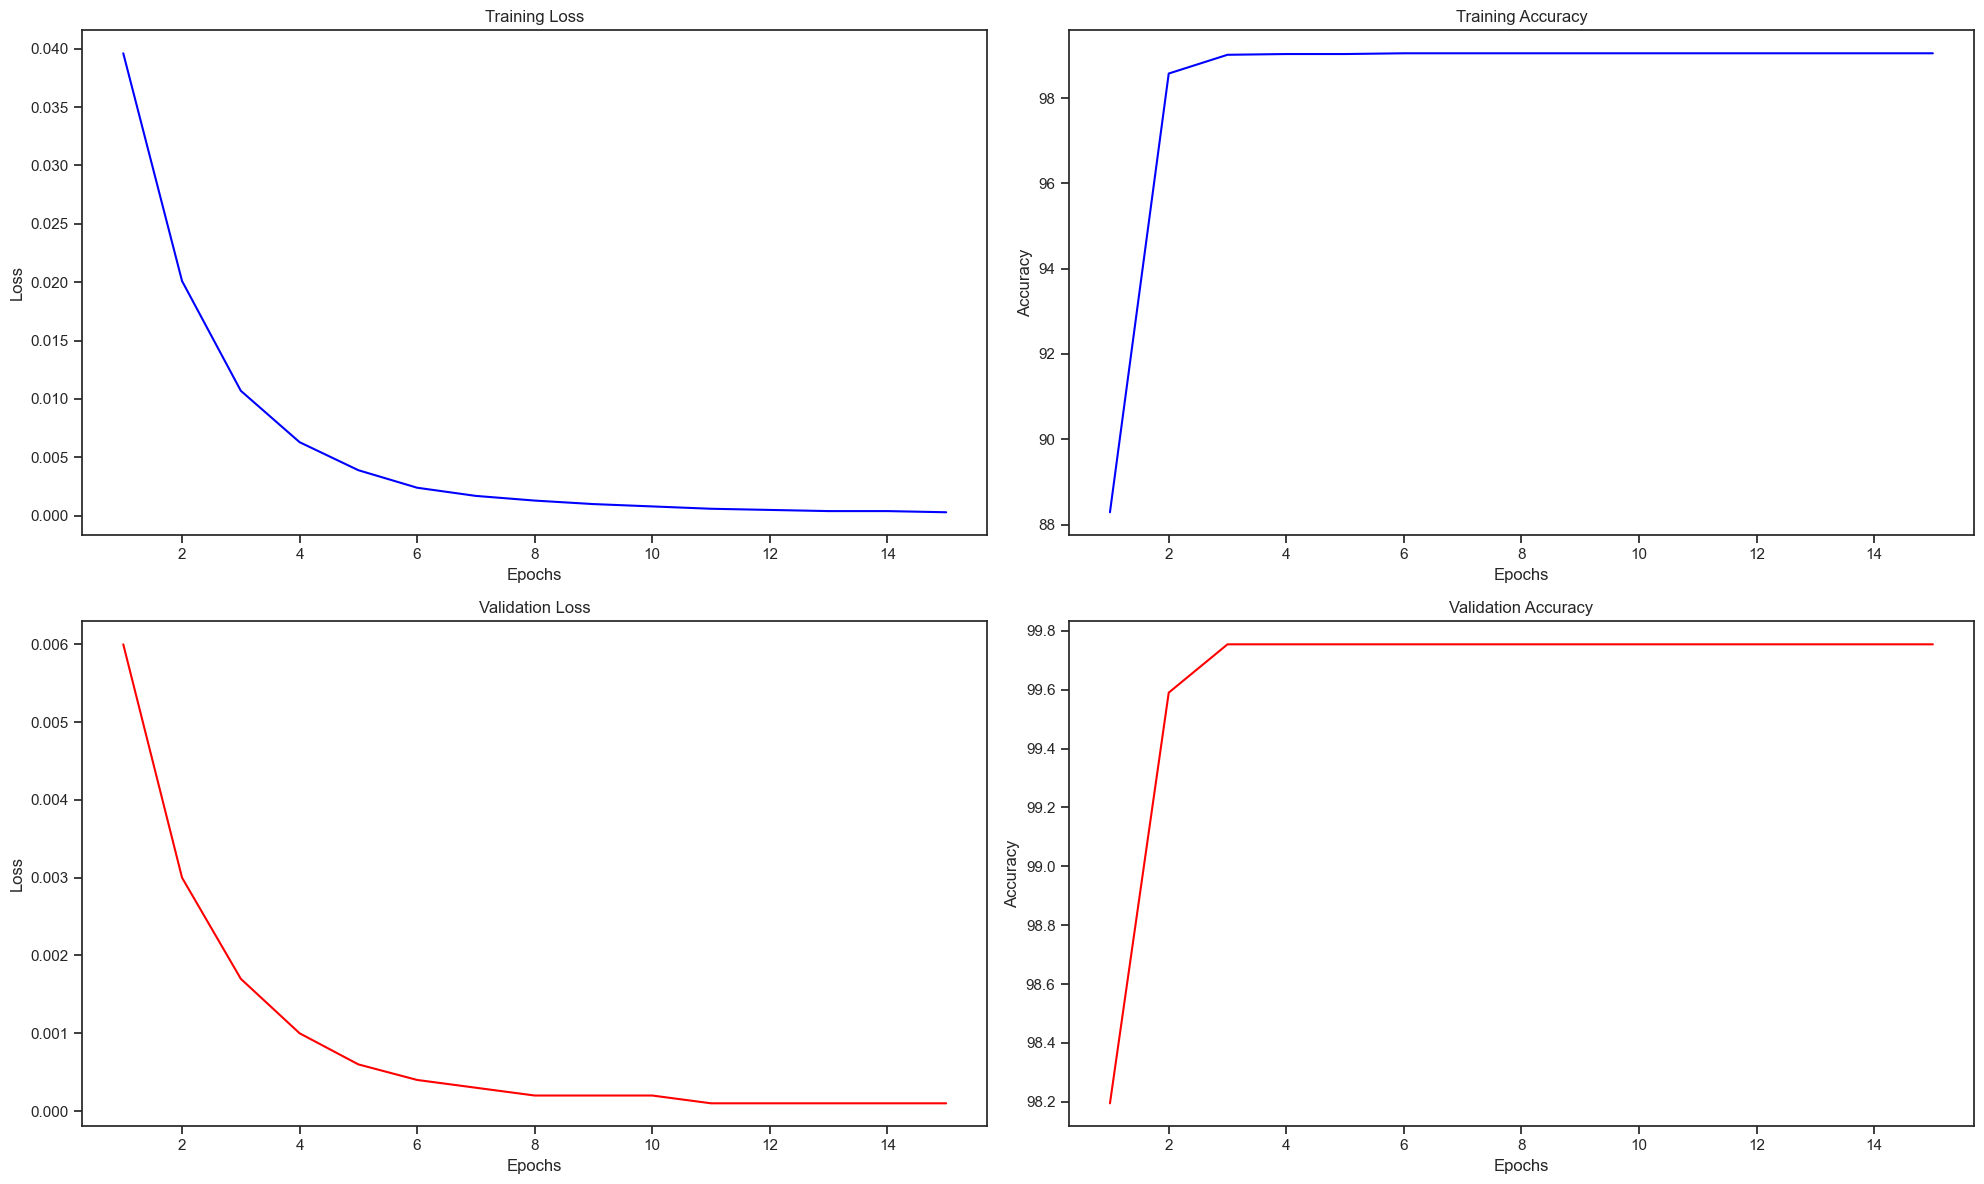

In [248]:
## this code block şs for visualization.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

epochs = [i for i in range(1, 16)]

# Define your data, titles, and labels
y_vals = [
    total_loss_train_plot,
    total_accuracy_train_plot,
    total_loss_validation_plot,
    total_accuracy_validation_plot
]

titles = [
    "Training Loss",
    "Training Accuracy",
    "Validation Loss",
    "Validation Accuracy"
]

y_labels = ["Loss", "Accuracy", "Loss", "Accuracy"]

# Define colors for the plots (training: default, validation: red)
colors = ["blue", "blue", "red", "red"]

# Flatten the axs array for easy iteration
axs_flat = axs.flatten()

# Loop through and plot
for i, (ax, y_val, title, y_label, color) in enumerate(zip(axs_flat, y_vals, titles, y_labels, colors)):
    sns.lineplot(x=epochs, y=y_val, ax=ax, color=color)
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel("Epochs")

plt.tight_layout()
plt.show()


/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


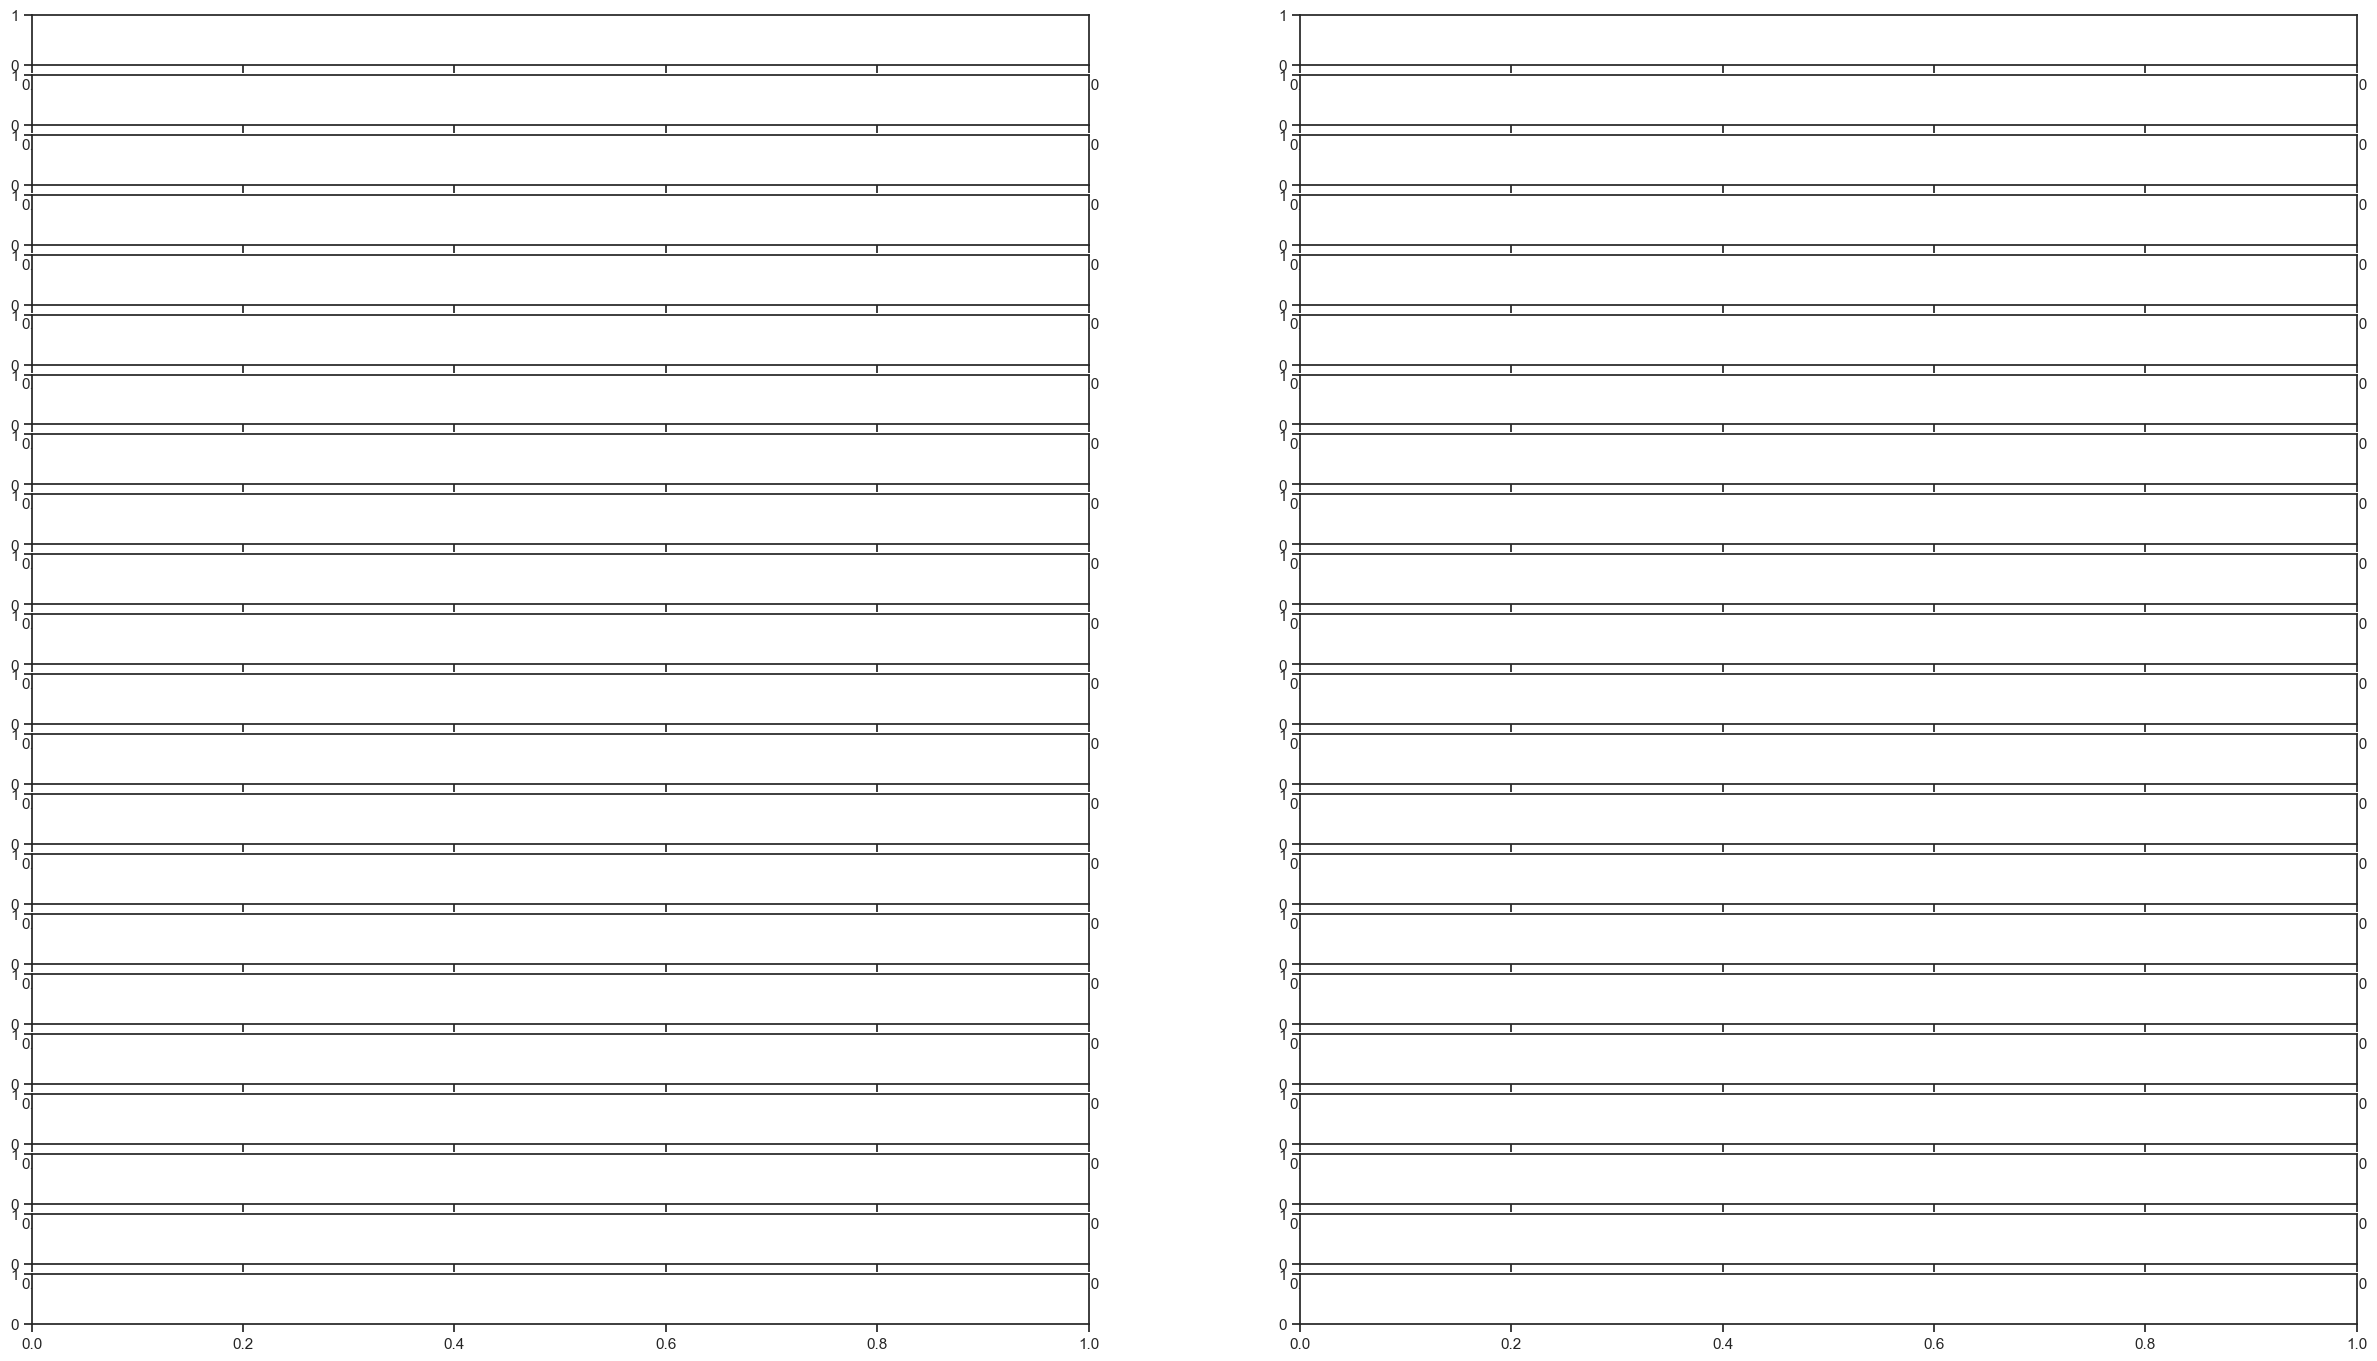

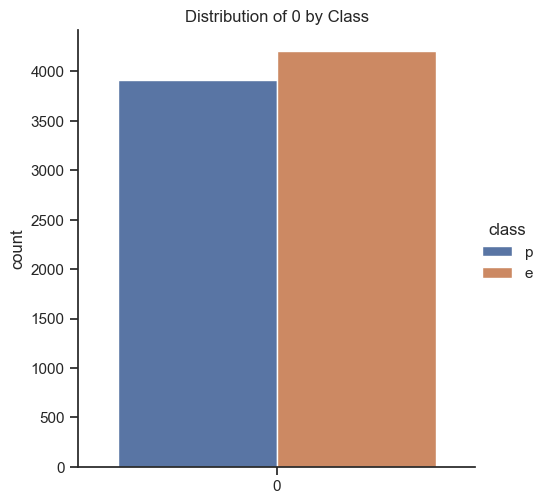

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


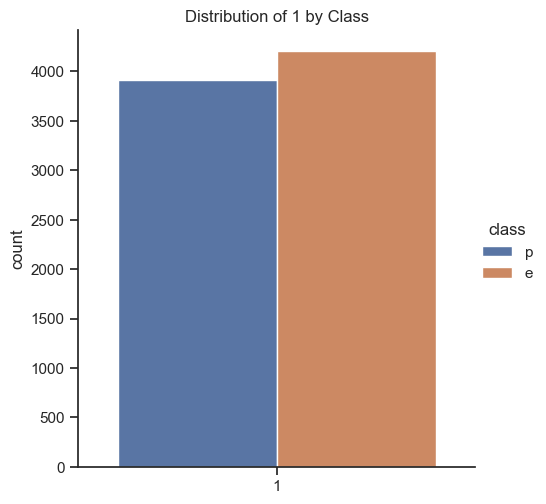

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


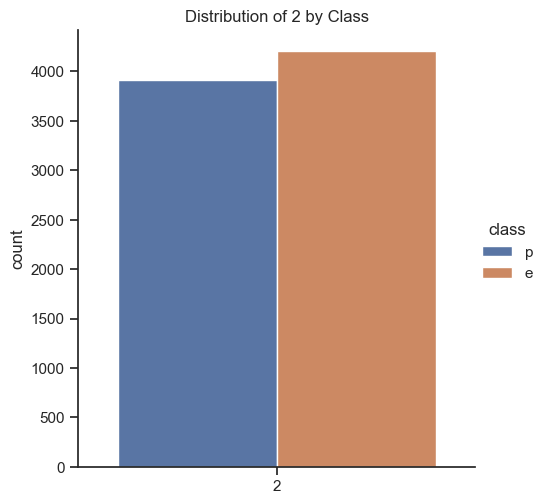

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


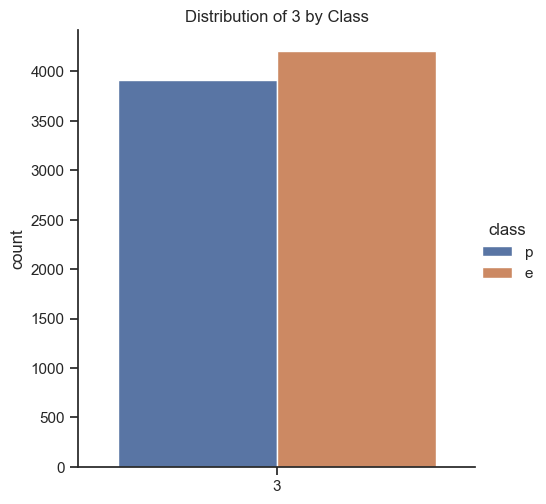

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


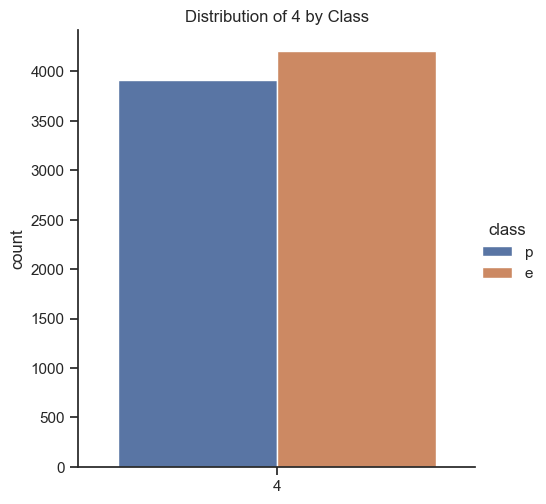

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


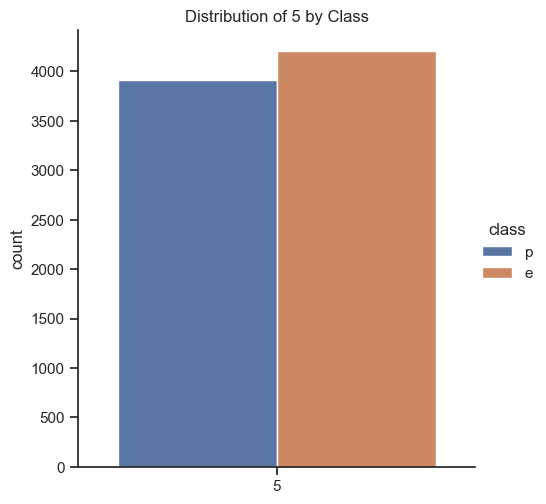

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


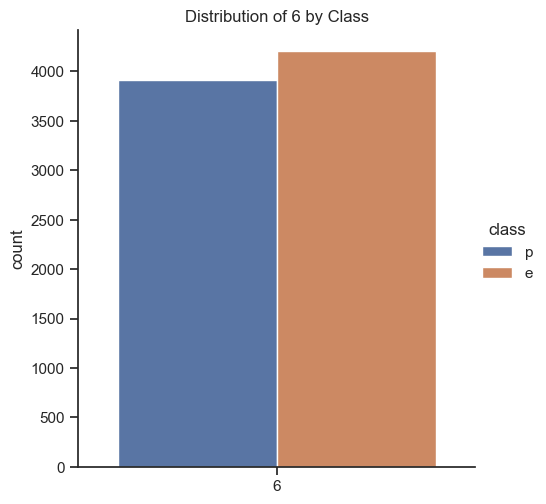

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


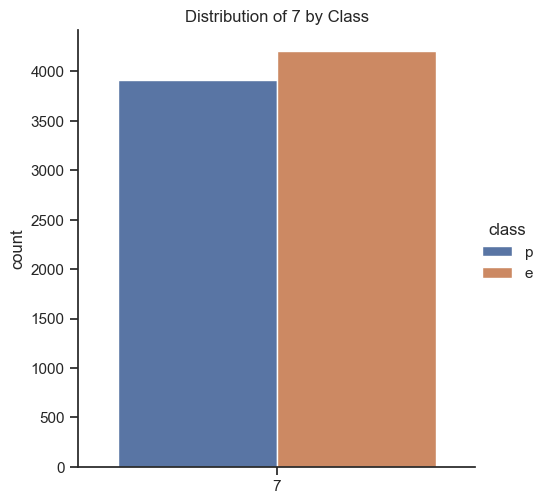

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


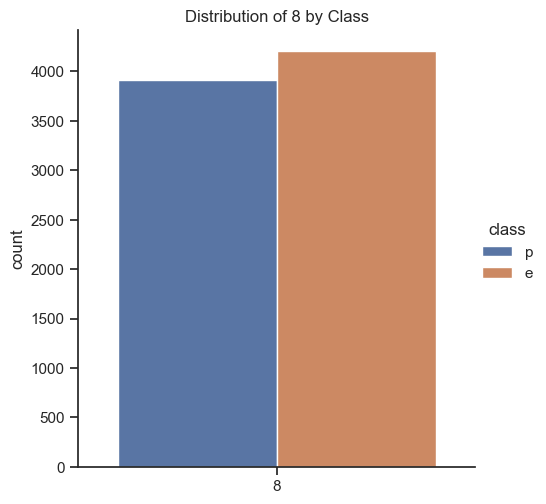

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


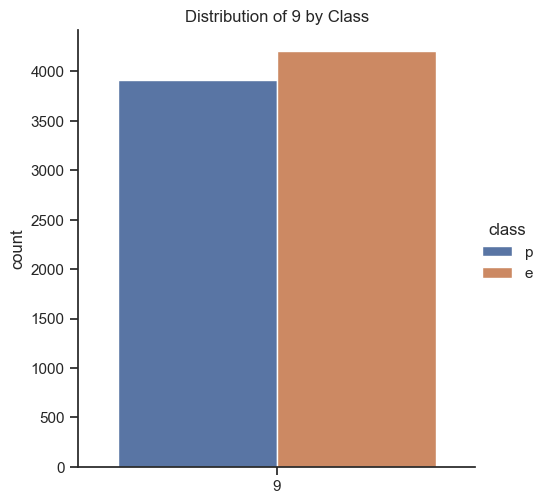

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


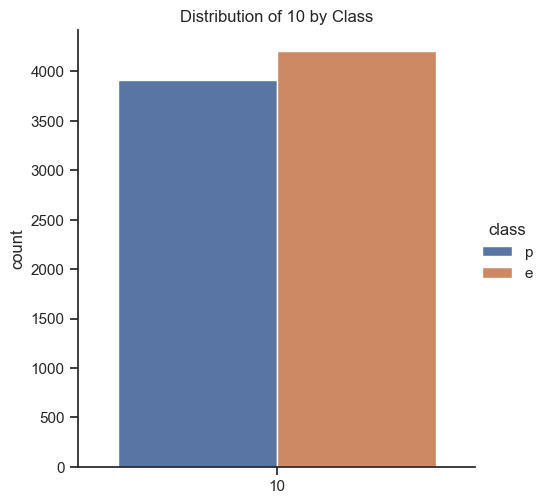

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


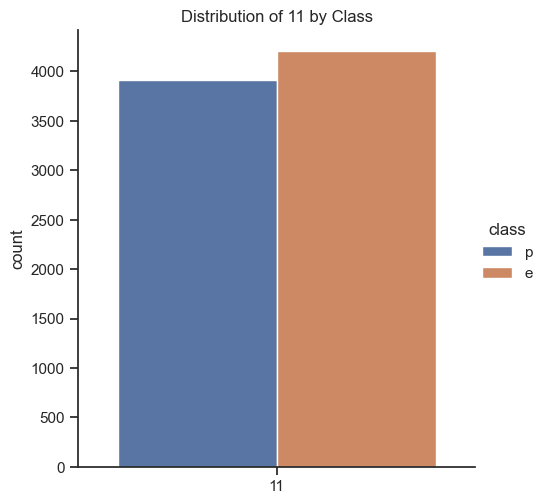

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


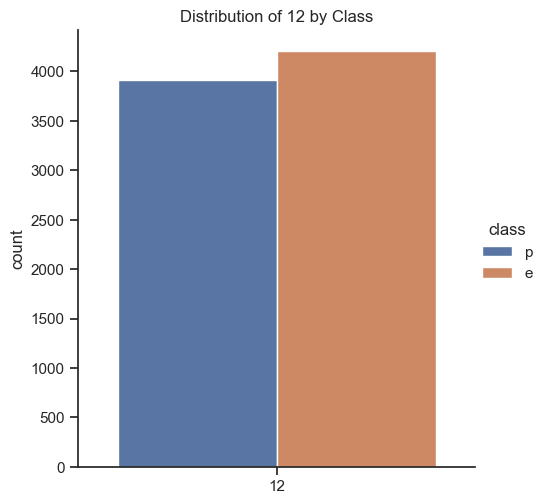

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


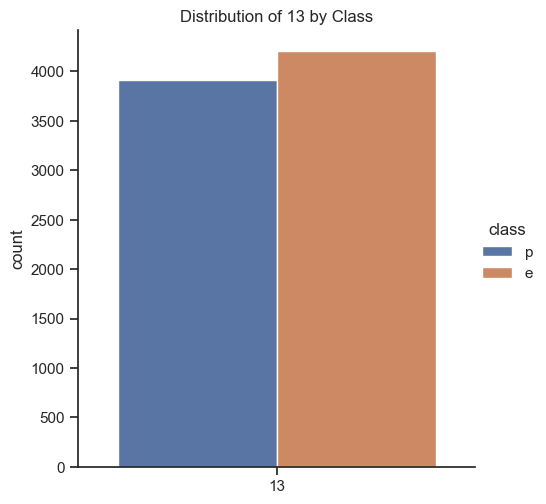

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


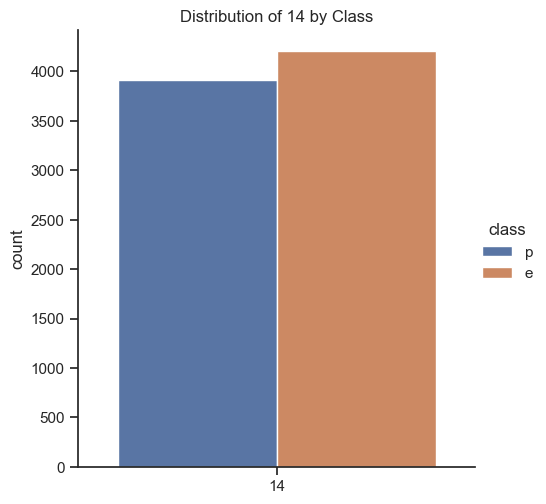

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


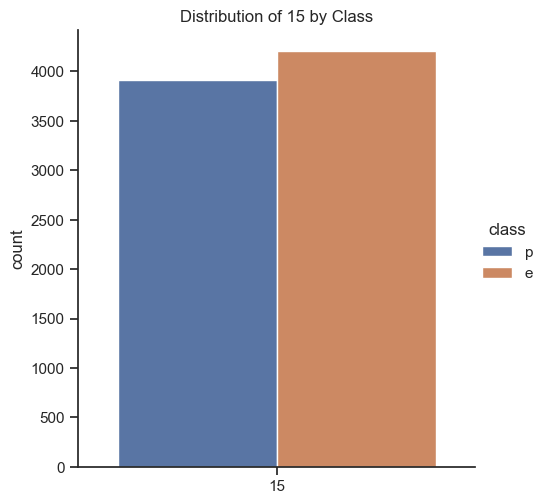

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


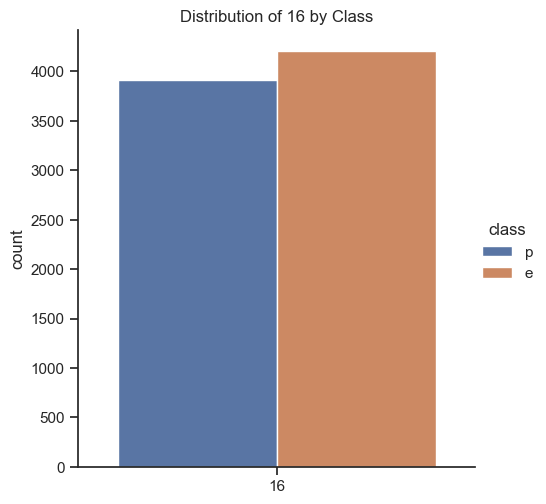

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


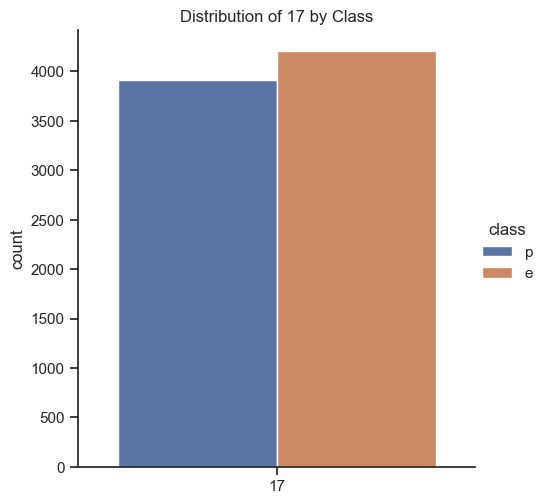

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


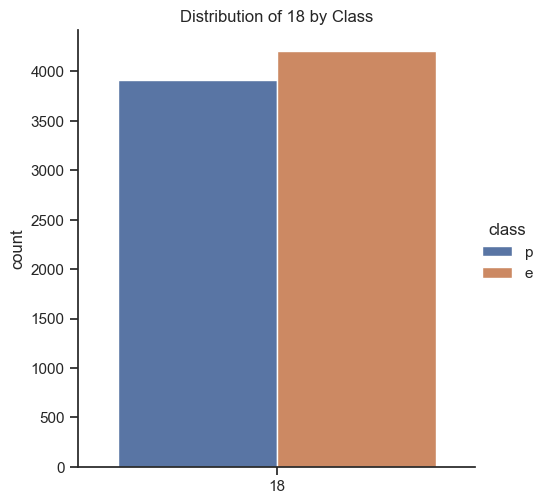

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


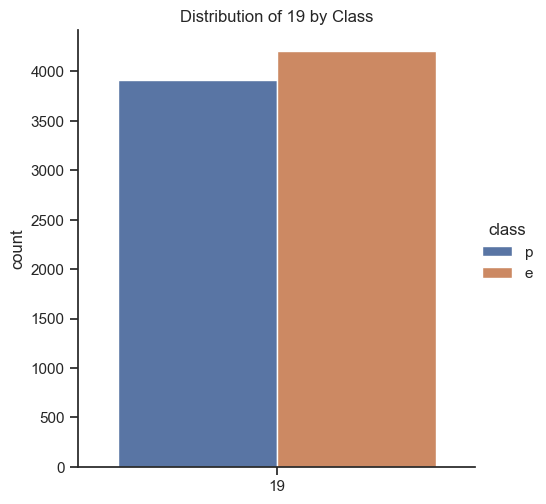

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


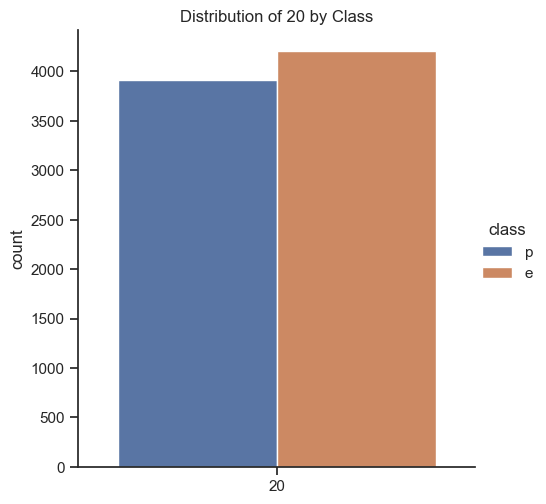

/opt/miniconda3/envs/pytorch_deneme/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


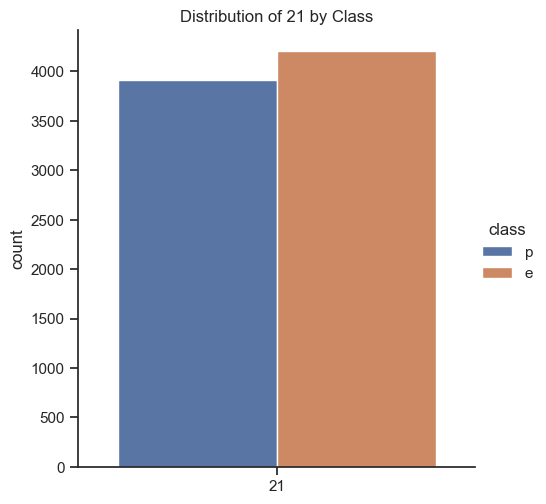

In [249]:
fig, axs = plt.subplots(nrows=22,ncols=2, figsize=(30,17))

for col, a in enumerate(zip(mushroom_copy.columns,axs)):
    if col != "class":  # Assuming "class" is the target variable
        sns.catplot(data=mushroom_copy, x=col, hue="class", kind="count", ax = a)
        plt.title(f"Distribution of {col} by Class")
        plt.show()

array([[607,   0],
       [  0, 609]])

Text(0.5, 1.0, 'Confusion Matrix')

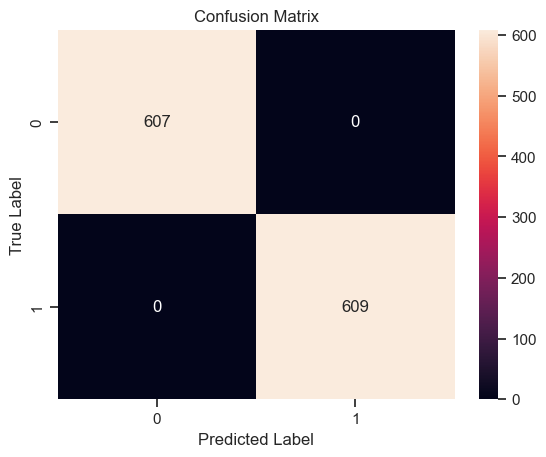

In [276]:
##confusion matric yapıcaz!!!!!!!!!
from sklearn.metrics import confusion_matrix

preds_arr = np.array(preds).reshape(-1)
yss_arr = np.array(yss).reshape(-1)
# display(preds_arr.reshape(-1).__len__())

# display(yss_arr.reshape(-1).__len__())
# display(yss.__len__())
# display(preds)
# display(preds.__len__())
calc = confusion_matrix(y_true=yss_arr, y_pred=preds_arr)
display(calc)
a =sns.heatmap(data=calc,annot=True, fmt="d")
a.set_ylabel("True Label")
a.set_xlabel("Predicted Label")
a.set_title("Confusion Matrix")
# sns.heatmap(data=calc)